# Applied Machine Learning

**Machine learning** is a branch of Artificial Intelligence (AI), where an algorithm (or **model**) improves itself through **"learning" from data** and, as a result, becomes increasingly proficient at performing its task.

The **process** of machine learning can be divided in the **7 steps** listed below:

1. Collect data
2. Prepare data (Preprocessing)
3. Choosing a model
4. Training
5. Evaluation
6. Hyperparameter tuning
7. Prediction

More details [here](https://livecodestream.dev/post/2020-06-02-7-steps-of-machine-learning/), [here](https://analyticsindiamag.com/the-7-key-steps-to-build-your-machine-learning-model/), [here](https://www.kdnuggets.com/2018/05/general-approaches-machine-learning-process.html)

# Collect data

Given a problem we want to solve, we have to **collect data** that we will use to feed our model. The **quality and quantity** of information we get are **very important**: they will directly impact the **performances** of our model, i.e. how well or badly our model will work.

A *dataset* is a **list of samples**: each sample is composed by a **set of features** and a desired **output** (or target). The objective of Machine Learning is to predict the value of the target of a sample from the values of the other features.

Data collection is an important task, but here we do not cover this topic: we will use [pre-collected data in scikit-learn](https://scikit-learn.org/stable/datasets/index.html) for our analyses.

# Preprocessing

Typically, **real-world data is dirty**: incomplete, inconsistent, inaccurate (contains errors or outliers), and sometimes lacks specific attribute values/trends. Data preprocessing tools help to **clean**, format, and organize the raw data, making it ready for Machine Learning models.

There are several significant **steps in data preprocessing**, that depend on the kind of data to handle:

1. Importing libraries
2. Getting (and watching) data
3. Handling missing values
4. Encoding categorical features
5. Feature aggregation
6. Feature sampling (optional)
7. Splitting the dataset
8. Feature scaling for numerical features (depending on the algorithm)
9. Dimensionality reduction (optional)

More details [here](https://www.upgrad.com/blog/data-preprocessing-in-machine-learning/), [here](https://medium.com/better-programming/data-preprocessing-for-machine-learning-3822ace03ae6), [here](https://towardsdatascience.com/data-preprocessing-concepts-fa946d11c825), [here](https://medium.com/@prtk13061992/data-preprocessing-steps-in-python-for-any-machine-learning-algorithm-2d52b57fa098).

Today we will cover all the steps of preprocessing in Python.

## 1. Importing libraries

There are predefined Python libraries that can perform specific data preprocessing jobs. The core Python libraries used for data preprocessing are:

* **[NumPy](https://numpy.org/)**: is the fundamental package for **scientific calculation** in Python. Hence, it is used for inserting any type of mathematical operation in the code;
* **[Pandas](https://pandas.pydata.org/)**: is a library for **data manipulation and analysis**, extensively used for importing and managing the datasets;
* **[Matplotlib](https://matplotlib.org/)**: is a Python **2D plotting library**, used to plot any type of charts in Python. Plots made in matplotlib may look "old" from an aesthetic point of view, a better choice for data visualization is **[Seaborn](https://seaborn.pydata.org/)**, a library build on top of Matplotlib that offers sane choices for plot style and color defaults; Another good choice, expecially good if the visualization needs to be dynamic and published on the web is [plotly](https://plotly.com).
* **[Sklearn.preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html)**: [sklearn](https://scikit-learn.org/stable/) is the fundamental library for Machine Learning (but not for Deep Learning!), and makes available many tools for **preprocessing data**.

All these libraries are already available in the [Anaconda](https://www.anaconda.com/) distribution.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.preprocessing import <name of the function>


## 2. Getting (and displaying) data

We need to **import the dataset** (or the datasets) for our ML project. Usually a dataset is saved as a **CSV (Comma-Separated Values) file**, a text file that uses a comma to separate values. For importing data in python from a csv file we use the ```read_csv``` function of Pandas library (details [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

We will load the "housing" dataset, which contains the following attributes:

1. `longitude`: A measure of how far west a house is; a higher value is farther west
2. `latitude`: A measure of how far north a house is; a higher value is farther north
3. `housing_median_age`: Median age of a house within a block; a lower number is a newer building
4. `total_rooms`: Total number of rooms within a block
5. `total_bedrooms`: Total number of bedrooms within a block
6. `population`: Total number of people residing within a block
7. `households`: Total number of households, a group of people residing within a home unit, for a block
8. `median_income`: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. `median_house_value`: Median house value for households within a block (measured in US Dollars)
10. `ocean_proximity`: Location of the house w.r.t ocean/sea

In [3]:
data = pd.read_csv("./datasets/housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In a dataset, each column is a **feature**, while each row is a **sample** (or an **example**).

After importing, we can have a look on the data by **visualizing** the values of some of their features. The visualization depends on the kind of feature:
* **Categorical**: features whose values are taken from a **defined set of values**, For example days in a week (Monday, Tuesday, ..., Sunday) or Boolean set (True, False). The values, distribution, and dispersion of categorical variables are best understood with **bar plots**;
* **Numerical**: features whose values are **continuous or integer-valued**, i.e. numbers. This kind of features can be visualized with **histograms**, or **scatter plots**, for visualizing relationships between two numerical features.

### Categorical features: bar plot ###



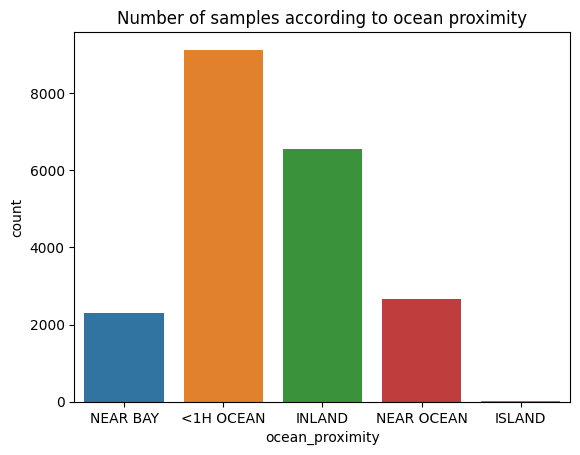

### Numerical features ###

# Histogram


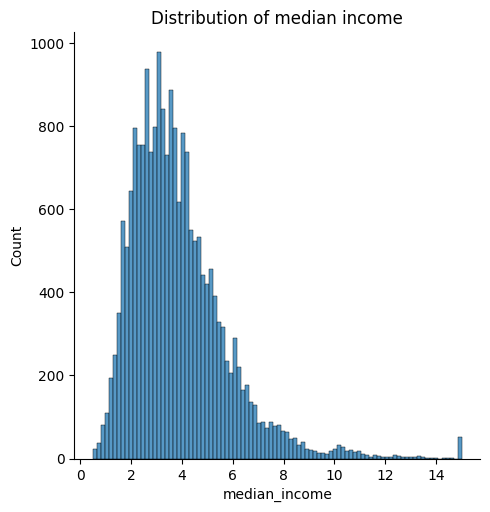

# Scatterplot


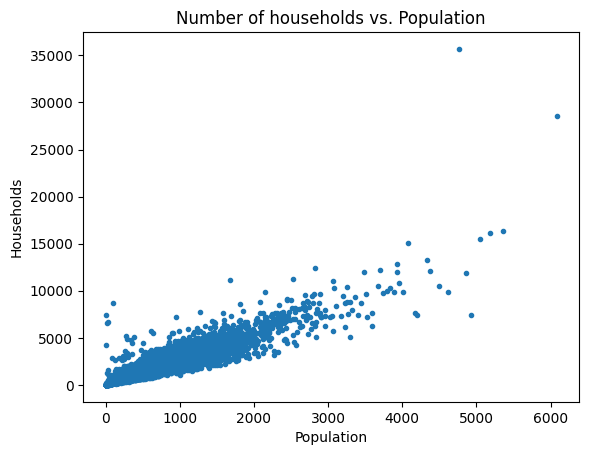

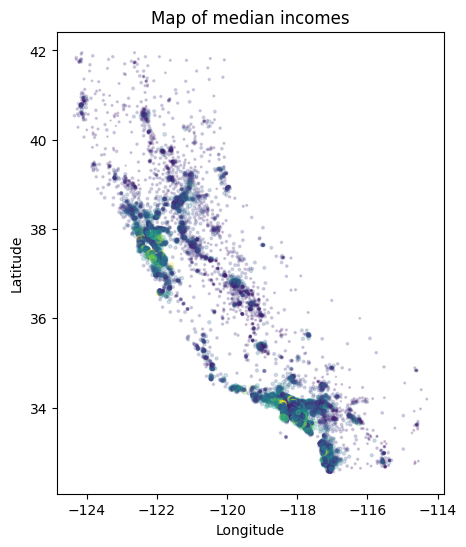

In [6]:
print("### Categorical features: bar plot ###\n")
sns.countplot(x=data["ocean_proximity"]);
plt.title("Number of samples according to ocean proximity")
plt.show()

#######################################################

print("### Numerical features ###\n")
print("# Histogram")

sns.displot(data["median_income"])
plt.title("Distribution of median income")
plt.show()

#######################################################

print("# Scatterplot")

plt.plot(data["households"], data["population"], '.')
plt.title("Number of households vs. Population")
#plt.yscale("log")     # what is the difference with log scale?
#plt.xscale("log")     # what is the difference with log scale?
plt.xlabel("Population")
plt.ylabel("Households")
plt.show()

#######################################################

plt.figure(figsize=(5,6))
plt.scatter(data["longitude"], data["latitude"], s=data["median_income"], c=data["median_income"], alpha=0.2)
plt.title("Map of median incomes")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In these lectures we will also employ the toy datasets made available by sklearn in the `sklearn.datasets` package (details [here](https://scikit-learn.org/stable/datasets/index.html))

In [4]:
from sklearn.datasets import load_iris

load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## 3. Handling missing values

Sometimes real-world data are **incomplete**, that is we can have samples with missing values in some feature. We can handle these missing values by:
* **deleting** the entire row/column with missing values;
* **replacing** the values with some kind of aggregate value, like mean, median, mode (i.e. most frequent), or with a constant value.

There is **no rule of thumb** to select a specific option, it depends on the data and the problem statement which is intended to solve. To select the best option, the knowledge of both data and the application are needed.


In [7]:
# select samples with missing data in a particular feature
data[data[["total_bedrooms"]].isnull().any(axis=1)]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [13]:

# select samples with missing data in any feature
data[data.isnull().any(axis=1)]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [18]:

# In this dataset only the 'total_bedrooms' colummns contains NaN values
notb = data.loc[:, data.columns != 'total_bedrooms']
notb[notb.isnull().any(axis=1)].size


0

### Delete samples or features

If we use the **deleting** strategy:
* for deleting **samples** with missing values we can use the `dropna` function of Pandas (details [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html));
* for deleting **features** with missing values we can use the `drop` function of Pandas (details [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)).

In [10]:
# select samples without missing data: assign result to "data" for deleting samples with missing values
data.dropna()
#data = data.dropna()

# # delete features with missing data: assign result to "data" for deleting features with missing values
data.drop(columns=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0,INLAND


### Replace values

If we decide for the **replacing** strategy:
* we can use only Pandas code;
* we can use the `SimpleImputer` transformer (details [here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)), where the parameter `strategy` sets the replacing strategy (mean, median, most_frequent, constant), and the parameter `fill_value` sets the value to use in case of "constant" strategy.

In [19]:
# replace missing values

# select value for missing values
value_for_missing_values = data[["total_bedrooms"]].mean().values[0]       # mean
#                         data[["total_bedrooms"]].median().values[0]      # median
#                         data[["total_bedrooms"]].mode().values[0][0]     # mode
#                         10                                               # constant value

# replace missing values in "total_bedrooms" feature
data.loc[data[["total_bedrooms"]].isnull().any(axis=1), "total_bedrooms"] = value_for_missing_values

# No samples with missing data are now present
data[data[["total_bedrooms"]].isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [21]:
from sklearn.impute import SimpleImputer

# get data again
data = pd.read_csv("./datasets/housing.csv")

# replace missing values in "total_bedrooms" feature with "mean" strategy
add_miss = SimpleImputer(missing_values=np.nan, strategy='mean')
data["total_bedrooms"] = add_miss.fit_transform(data[["total_bedrooms"]])

# No samples with missing data are now present
data[data[["total_bedrooms"]].isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


## 4. Encoding *categorical* features

A Feature is **categorical** if its values are taken from a defined set of values (or classes). Categorical features can be divided in:
* **Ordinal**: values have a natural implied order, even if the scale of difference is not defined, for example ("Extra small", "Small", "Medium", "Large", "Extra large");
* **Nominal**: values without any implied order, for example colors ("Red", "Green", "Blue").

Depending on the learning algorithm, **it may be necessary to encode categorical and ordinal features into a numerical representation**.

Ordinal and nominal features can be encoded in different ways:
* **Ordinal encoding**: for *ordinal* features, each value is mapped to a single numerical value; in this way we can inform the model that two nearby values are more similar than two distant ones. It is implemented in sklearn with the `OrdinalEncoder` method (details [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)).
* **One-hot encoding**: for *nominal* features, each value is mapped on a vector, where only one attribute will be equal to 1 (hot), while the others will be 0 (cold). In sklearn it is implemented by means of the function `OneHotEncoder` (details [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)).

In [32]:
### Encoding ordinal features using Pandas

data["ocean_proximity_ord"] =data["ocean_proximity"].replace(
    {'INLAND': 0, 'NEAR BAY': 1, 'NEAR OCEAN':2, '<1H OCEAN':3, 'ISLAND':4})

data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ord_ocean_proximity,ocean_proximity_ord
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,1,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,1,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,1,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,1,0


In [31]:
# Encoding ordinal features using sklearn

# Refreshing the dataset
data = pd.read_csv("./datasets/housing.csv")


### Using SKLearn
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
ord_features = ordinal_encoder.fit_transform(data[["ocean_proximity"]])

# converting to pandas and to the right type
ord_features = pd.DataFrame(ord_features, columns=["ord_ocean_proximity"])
ord_features = ord_features.astype("int")

# add new features to dataset
data = data.merge(ord_features, left_index=True, right_index=True)
data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ord_ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,1


In [39]:
### Encoding nominal features using Pandas

# Refreshing the dataset
data = pd.read_csv("./datasets/housing.csv")

ocean_prox = data[["ocean_proximity"]]
ocean_prox_1hot = pd.get_dummies(ocean_prox, prefix="ocean_proximity")

data.merge(ocean_prox_1hot, left_index=True, right_index=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ord_ocean_proximity,ocean_proximity_ord,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3,1,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3,1,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3,1,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3,1,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,1,0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,1,0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,1,0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,1,0,0,1,0,0,0


In [ ]:
### Encoding nominal features using SKLearn

# Refreshing the dataset
from sklearn.preprocessing import OneHotEncoder
data = pd.read_csv("./datasets/housing.csv")


nom_encoder = OneHotEncoder()
nom_features = nom_encoder.fit_transform(data[["ocean_proximity"]])
# sparse matrix to list of arrays
nom_features = nom_features.toarray()
# list of arrays to dataframe
nom_features = pd.DataFrame(nom_features, columns=nom_encoder.categories_[0].tolist())
# change type of features: from float to int
nom_features = nom_features.astype("int")
# add new features to dataset
data = data.merge(nom_features, left_index=True, right_index=True)
data


## 5. Feature aggregation

**Aggregation** provides a high-level view of the data, since the behaviour of groups or aggregates is more stable than individual data objects.

Aggregation can be performed with the `groupby` function of Pandas (details [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)): such function is applied to a dataframe, and has the form

```python
df.groupby(<columns>).<aggregate function>
```

where "columns" are the columns to aggregate, and "aggregate function" is the statistics to apply in each group, such as `mean()`, `median()`, `sum()` or `count()`. It id usually followed by the function `reset_index` (details [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)), that reset the index of the dataframe.

In [41]:
# import data
data_2 = pd.read_csv("./datasets/daily-min-temperatures.csv")

# preprocessing: add features from Date
# remember: indexes starts from 0 and the last index in a range is not included
data_2["Year"] = [int(x[:4]) for x in data_2["Date"]]
data_2["Month"] = [int(x[5:7]) for x in data_2["Date"]]
data_2["Day"] = [int(x[8:]) for x in data_2["Date"]]

# print dataset
data_2

,Date,Temp,Year,Month,Day
0,1981-01-01,20.7,1981,1,1
1,1981-01-02,17.9,1981,1,2
2,1981-01-03,18.8,1981,1,3
3,1981-01-04,14.6,1981,1,4
4,1981-01-05,15.8,1981,1,5
...,...,...,...,...,...
3645,1990-12-27,14.0,1990,12,27
3646,1990-12-28,13.6,1990,12,28
3647,1990-12-29,13.5,1990,12,29
3648,1990-12-30,15.7,1990,12,30


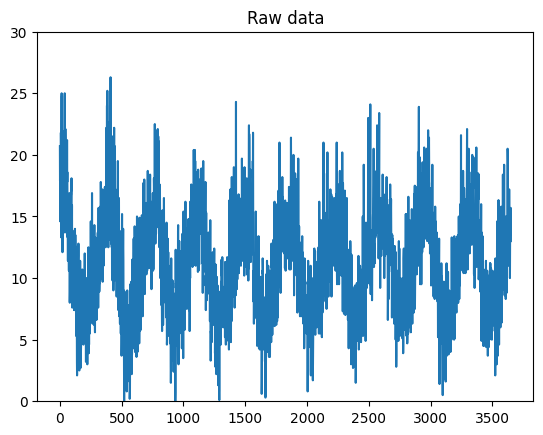

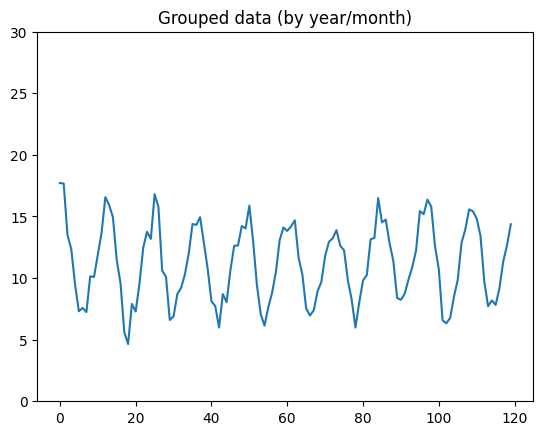

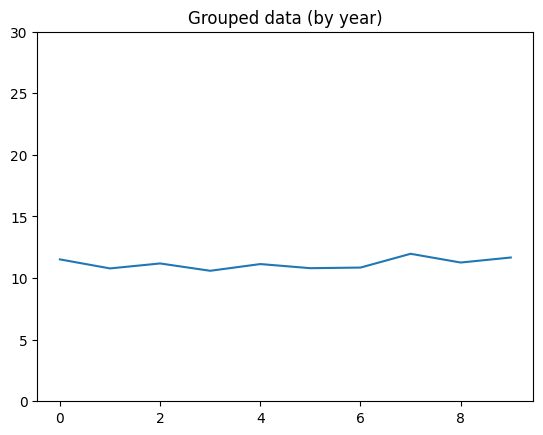

In [42]:
# plot data
plt.plot(range(len(data_2)), data_2["Temp"])
plt.ylim(0,30)
plt.title("Raw data")
plt.show()

# group data by year and month, by calculating the average
data_2_grouped = data_2[["Year", "Month", "Temp"]].groupby(["Year","Month"]).mean().reset_index()

# plot grouped data
plt.plot(range(len(data_2_grouped)), data_2_grouped["Temp"])
plt.ylim(0,30)
plt.title("Grouped data (by year/month)")
plt.show()


data_3_grouped = data_2[["Year", "Month", "Temp"]].groupby(
    ["Year"]).mean().reset_index()

plt.plot(range(len(data_3_grouped)), data_3_grouped["Temp"])
plt.ylim(0, 30)
plt.title("Grouped data (by year)")
plt.show()


## 6. Feature sampling (optional)

**Sampling** is a method that allows us to **get information about the population** based on the statistics from a subset of the population (sample), without having to investigate every individual. The obective is to determine a population’s characteristics by directly observing only a portion (or sample) of the population.

In Machine Learning, Sampling is employed:
* for a **preliminary investigation** and/or analysis of the data;
* when **obtaining** the entire set of data is too expensive or time consuming;
* when **processing** the entire set of data is too expensive or time consuming.

There are several techniques for sampling (a good list is available [here](https://www.analyticsvidhya.com/blog/2019/09/data-scientists-guide-8-types-of-sampling-techniques/)), here we show how to implement the basic ones:
* **Simple Random Sampling**: the probability of selecting any particular item is equal. In a pandas dataframe, we can employ the `sample` function (details [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)): for a random sampling **without replacement** (when an item is selected, it is removed from the population), we must set `replace=False`, while for a random sampling **with replacement** (when an item is selected, it is not removed from the population), we must set `replace=True`. Another important parameter is `random_state`, that sets the seed of the random generator;
* **Stratified Sampling**: split the data into several partitions, then draw random samples from each partition. In this way, we are able to keep in the sample a desired proportion of examples from each group. We'll se later how to get a stratified sampling in Python.


In [44]:
## Simple random sampling

# get 5 random samples without replacement
data.sample(n=5, replace=False, random_state=0)

# get 5 random samples with replacement
data.sample(n=5, replace=True, random_state=42)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ord_ocean_proximity,ocean_proximity_ord
15795,-122.42,37.77,52.0,4226.0,1315.0,2619.0,1242.0,2.5755,325000.0,NEAR BAY,3,1
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN,0,3
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN,0,3
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND,1,0
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN,0,3


In [45]:
print("### Difference between Sampling with or without replacement ###\n")

print("Sampling without replacement from the top 10 samples of dataset: no repetitions")
data[:10].sample(n=5, replace=False, random_state=0)

### Difference between Sampling with or without replacement ###

Sampling without replacement from the top 10 samples of dataset: no repetitions


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ord_ocean_proximity,ocean_proximity_ord
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3,1
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,3,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,1
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,3,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3,1


In [46]:
print("Sampling with replacement from the top 10 samples of dataset: possible repetitions")
data[:10].sample(n=5, replace=True, random_state=0)

Sampling with replacement from the top 10 samples of dataset: possible repetitions


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ord_ocean_proximity,ocean_proximity_ord
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,3,1
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3,1
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,3,1


### 7. Splitting the dataset 

In order to avoid underestimating the generalization error we cannot estimate it over the same data we used for training the model. In most cases, the dataset needs to be **split** into two (not overlapping) sets: a **train set**, for *training the model*, and a **test set**, for *evaluating the performances* of the model. 

The objective of such operation is to evaluate the performances of the trained model: we use the train set for training the ML model, then we feed the trained model with the samples in the test model, and we check how much the results of the prediction coincide with the real outputs. In this way, test samples represent real-world data, that have not been employed for training the model.

The method `train_test_split` (details [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) is employed for splitting the dataset into train and test sets: the first parameter is the matrix of the values of features, and the secon parameter is the list of target values. the user should specify the ratio of train set (using the parameter `train_size`) or the ratio of test set (with the parameter `test_size`). In order to improve the performances of the model, we should always randomly shuffle the dataset before splitting (setting the `shuffle` parameter to `True`, and a random seed with `random_state`); it could be also useful to set the `stratify` parameter, that applies stratified sampling on the list of features passed as argument (the proportion of values in the two sets will be the same as the proportion of values provided to parameter). The function returns 4 variables: the matrix of train set, the matrix of test set, the list of train targets, the list of test targets.

In our example, we would like to predict the house value according to the other features:

In [47]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(data.drop(columns=["ocean_proximity", "ord_ocean_proximity", "median_house_value"]), data["median_house_value"], test_size=0.25, shuffle=True, random_state=0)


In [48]:
# print split datasets
train_data
#test_data
#train_labels
#test_labels

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_ord
19226,-122.68,38.46,19.0,4976.0,711.0,1926.0,625.0,7.3003,3
14549,-117.24,32.95,18.0,1591.0,268.0,547.0,243.0,5.9547,2
9093,-118.27,34.68,19.0,552.0,129.0,314.0,106.0,3.2125,0
12213,-117.18,33.51,13.0,270.0,42.0,120.0,42.0,6.9930,3
12765,-121.41,38.62,21.0,3260.0,763.0,1735.0,736.0,2.5162,0
...,...,...,...,...,...,...,...,...,...
13123,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,0
19648,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,0
9845,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,2
10799,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,3


## 8. Feature scaling for **numerical features**

Several ML algorithms are **distance-based**, i.e. they employ the distance among samples in a N-dimensional space. The drawback of such algorithms is that distance-based models cause **features with larger values to tend to dominate the features with smaller values**.

In order to solve this issue, we can scale into a fixed range the values of each numerical features. In other words, feature scaling permits to limit the range of variables so that you can compare them on common grounds.


Scikit-learn makes available [several methods](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) for transforming data before processing them, but the common methods used in such task are:
* **Standardization**: subtracts the mean of each observation and then divides it by the standard deviation, implemented in scikit-learn on the ```StandardScaler``` method (details [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)). This technique is more effective if the feature follows a Gaussian distribution; and if the algorithm you are using does make assumptions about your data having a Gaussian distribution (such as linear regression, logistic regression, PCA).
* **Normalization**: scales data to a fixed range — usually 0 to 1 - by means of the function ```MinMaxScaler``` (details [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler))). It is effective when features have different ranges, and when the algorithm you are using does not make assumptions about the distribution of your data (k-Nearest Neighbors, SVM, Neural Networks).

The feature scaling for numerical features must be applied **after splitting the dataset in train and test set**: the transformer must be trained on the train set only, in order to calculate mean and standard deviation of training samples, and then applied on both train and test sets. Test samples represent real-world data, then if we take the mean and variance of the whole dataset we will be introducing future information into the training explanatory variables:
* use ```fit_transform()``` on the **training set**;
* use ```transform()``` on the **test set**.

Feature scaling for numerical features is not required (and thus not effective when applied) for models that don’t take a distance-based approach, such as tree-based models (Decision Trees and Random Forests) or probability-based models (Naive Bayes).

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# train transformer on train data, and transform them
train_data[["population"]] = scaler.fit_transform(train_data[["population"]])
# now the transformer is trained on train data, it can be applied on test data
test_data[["population"]] = scaler.transform(test_data[["population"]])

test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_ord
14740,-117.05,32.58,22.0,2101.0,399.0,0.108974,371.0,4.1518,2
10101,-117.97,33.92,32.0,2620.0,398.0,-0.113834,429.0,5.7796,3
20566,-121.84,38.65,29.0,3167.0,548.0,0.111595,534.0,4.3487,0
2670,-115.60,33.20,37.0,709.0,187.0,-0.905454,142.0,2.4511,0
15709,-122.43,37.79,25.0,1637.0,394.0,-0.679152,379.0,5.0049,1
...,...,...,...,...,...,...,...,...,...
13132,-121.48,38.46,8.0,10505.0,1777.0,3.998049,1694.0,4.0516,0
8228,-118.19,33.77,35.0,1574.0,603.0,-0.529740,514.0,1.2321,2
3948,-118.61,34.20,16.0,1718.0,467.0,-0.463335,475.0,3.6296,3
8522,-118.34,33.90,37.0,542.0,105.0,-0.936035,118.0,5.5133,3


In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# train transformer on train data, and transform them
scaler.fit(train_data[["total_rooms"]])
train_data[["total_rooms"]] = scaler.transform(train_data[["total_rooms"]])
# now the transformer is trained on train data, it can be applied on test data
test_data[["total_rooms"]] = scaler.transform(test_data[["total_rooms"]])

test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_ord
14740,-117.05,32.58,22.0,0.064337,399.0,0.108974,371.0,4.1518,2
10101,-117.97,33.92,32.0,0.080245,398.0,-0.113834,429.0,5.7796,3
20566,-121.84,38.65,29.0,0.097011,548.0,0.111595,534.0,4.3487,0
2670,-115.60,33.20,37.0,0.021670,187.0,-0.905454,142.0,2.4511,0
15709,-122.43,37.79,25.0,0.050115,394.0,-0.679152,379.0,5.0049,1
...,...,...,...,...,...,...,...,...,...
13132,-121.48,38.46,8.0,0.321931,1777.0,3.998049,1694.0,4.0516,0
8228,-118.19,33.77,35.0,0.048184,603.0,-0.529740,514.0,1.2321,2
3948,-118.61,34.20,16.0,0.052598,467.0,-0.463335,475.0,3.6296,3
8522,-118.34,33.90,37.0,0.016552,105.0,-0.936035,118.0,5.5133,3
